<a href="https://colab.research.google.com/github/MONAlIS-A/ANN/blob/main/early_stopping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [2]:
import numpy as np
import pandas as pd
from pylab import rcParams
import  matplotlib.pyplot as plt

In [3]:
import warnings

In [4]:
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap


In [5]:
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping


In [6]:
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
import seaborn as sns

In [7]:
X, y = make_circles(n_samples=100, noise=0.1, random_state=1)

<Axes: >

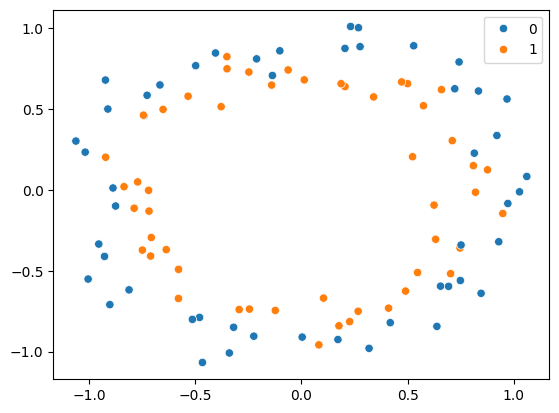

In [8]:
sns.scatterplot(x=X[:, 0], y=X[:,1], hue=y)

In [9]:
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

In [10]:
model = Sequential()
model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,025 (4.00 KB)

 Trainable params: 1,025 (4.00 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [13]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3500, verbose=0)

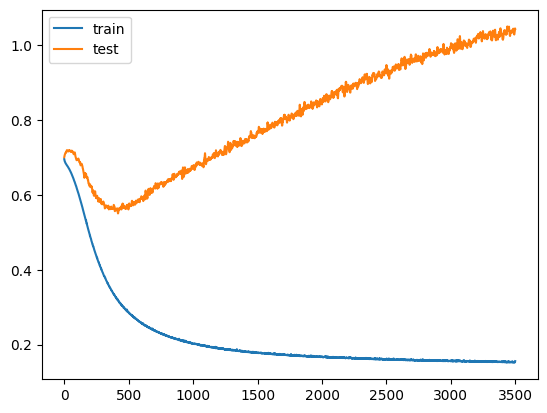

In [14]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [15]:
print(history.history.keys())



dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


9600/9600 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step


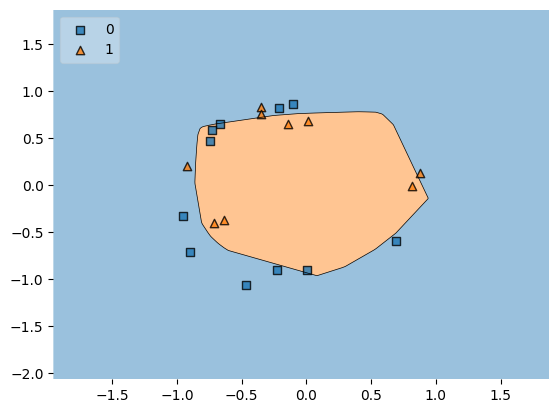

In [16]:
plot_decision_regions(X_test, y_test.ravel(), clf=model, legend=2)
plt.show()

# Early Stopping

In [17]:
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [18]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [19]:
callback = EarlyStopping(
    monitor='val_loss',
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=False
)

In [20]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3500, verbose=0, callbacks=[callback])

Epoch 21: early stopping


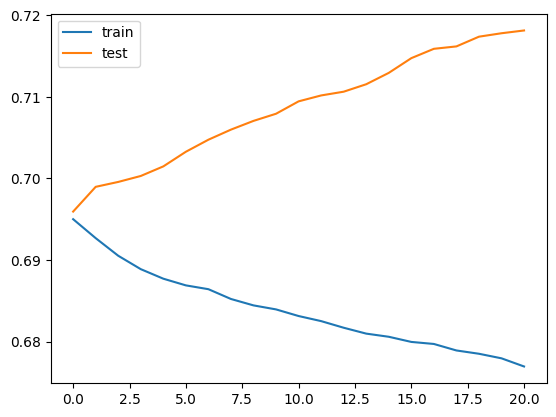

In [21]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step


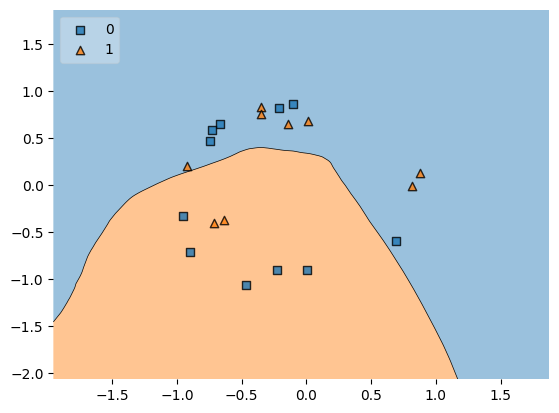

In [22]:
plot_decision_regions(X_test, y_test.ravel(), clf=model, legend=2)
plt.show()